In [62]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [64]:
df = pd.read_csv("C:/Users/jinwo/Downloads/wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [66]:
# 컬렴명 확인
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

Text(0.5, 1.0, 'Label')

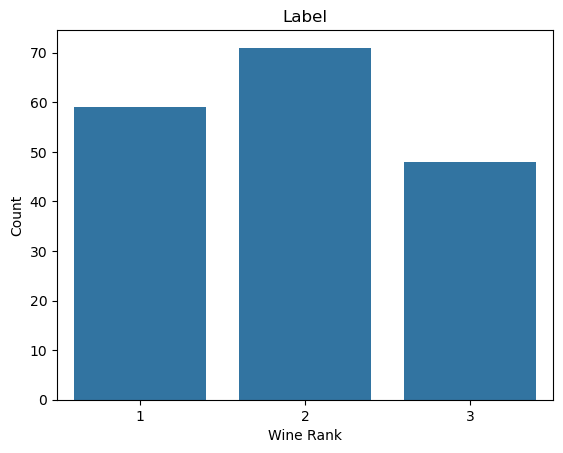

In [68]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Wine")
plt.xlabel("Wine Rank")
plt.ylabel("Count")
plt.title("Label")

In [70]:
# 레이블 갯수 확인 (숫자)
df['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [72]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [74]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [76]:
X=df.drop('Wine',axis=1)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [78]:
y=df['Wine']
y.value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [80]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [82]:
print(y.shape)
Y = pd.get_dummies(y).values

(178,)


In [84]:
print(Y.shape)  # 예: (178, 3)


(178, 3)


In [86]:
X = X.values
X
y
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 튜닝할 하이퍼파라미터 리스트
learning_rates = [0.01, 0.02, 0.04]
epoch_list = [30, 50]
best_val_acc = 0
best_params = {}
best_model = None

for lr in learning_rates:
    for epochs in epoch_list:
        print(f"\n▶ Trying: learning_rate={lr}, epochs={epochs}")

        # 모델 구성
        model = Sequential()
        model.add(Dense(3, input_shape=(13,), activation='softmax'))

        # 컴파일
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # 학습
        history = model.fit(
            x=X_train, y=y_train,
            epochs=epochs,
            batch_size=32,
            validation_data=(X_test, y_test),
            verbose=0
        )

        val_acc = history.history['val_accuracy'][-1]
        print(f"→ Validation Accuracy: {val_acc:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_params = {'learning_rate': lr, 'epochs': epochs}
            best_model = model

print("\n Best Validation Accuracy:", best_val_acc)
print("Best Hyperparameters:", best_params)



▶ Trying: learning_rate=0.01, epochs=30


C:\Users\jinwo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


→ Validation Accuracy: 0.3333

▶ Trying: learning_rate=0.01, epochs=50
→ Validation Accuracy: 0.9444

▶ Trying: learning_rate=0.02, epochs=30
→ Validation Accuracy: 0.9167

▶ Trying: learning_rate=0.02, epochs=50
→ Validation Accuracy: 0.9167

▶ Trying: learning_rate=0.04, epochs=30
→ Validation Accuracy: 0.9722

▶ Trying: learning_rate=0.04, epochs=50
→ Validation Accuracy: 0.8056

 Best Validation Accuracy: 0.9722222089767456
Best Hyperparameters: {'learning_rate': 0.04, 'epochs': 30}


In [89]:
y_pred = best_model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 정확도, confusion matrix 출력 등 계속 이어서 사용 가능


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


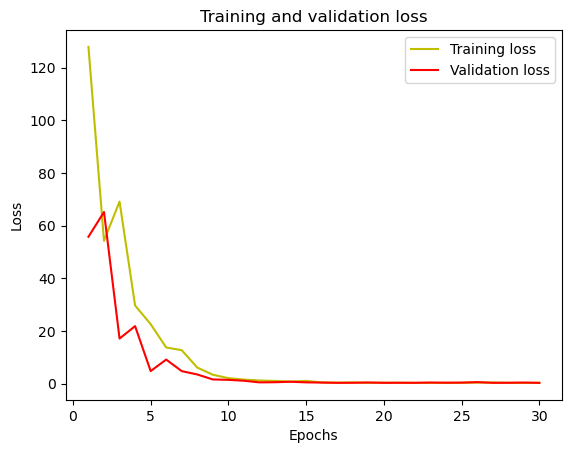

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

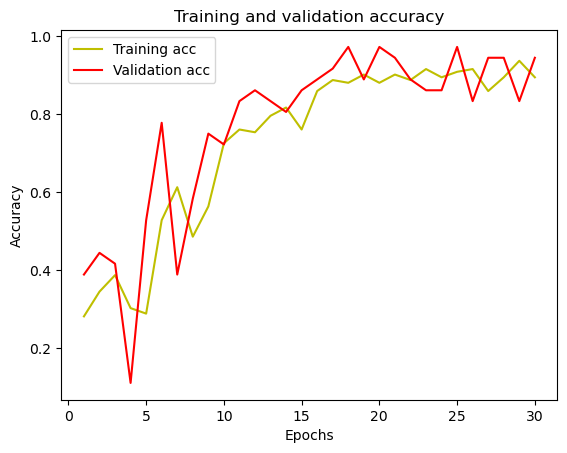

In [91]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

[[13  1  0]
 [ 0 16  0]
 [ 0  0  6]]
